# Networks Using Blocks (VGG)

In [1]:
import d2l
from mxnet import gluon, np, npx
from mxnet.gluon import nn
npx.set_np()

train_iter, test_iter = d2l.load_data_fashion_mnist(
    batch_size=128, resize=224)

VGG block

In [2]:
def vgg_block(num_convs, num_channels):
    blk = nn.Sequential()
    for _ in range(num_convs):
        blk.add(nn.Conv2D(num_channels, kernel_size=3,
                          padding=1, activation='relu'))
    blk.add(nn.MaxPool2D(pool_size=2, strides=2))
    return blk

The model

In [3]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

def vgg(conv_arch):
    net = nn.Sequential()
    # The convolutional layer part
    for (num_convs, num_channels) in conv_arch:
        net.add(vgg_block(num_convs, num_channels))
    # The fully connected layer part
    net.add(nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
            nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
            nn.Dense(10))
    return net

net = vgg(conv_arch)

Training with narrow version

loss 0.177, train acc 0.935, test acc 0.925
9350.4 exampes/sec on gpu(0)


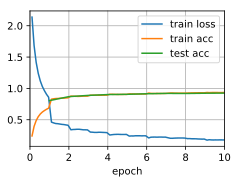

In [4]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)
d2l.train_ch5(net, train_iter, test_iter, num_epochs=10, lr=0.05)